In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Логистическая регрессия
# Более глубокий метод анализа номинативных переменных по сравнению с линейной регрессией
# Популярный метод - бинарная классификация
# Зависимая переменная - две градации - представляется через линейную комбинацию предикторов

In [3]:
# Та или иная градация возможная с некоторой степенью вероятности p
# Что p связать с предикторами на диапазоне (-беск, +беск), то понятие логарифма шанса
# odds - шансы odds = p/(1-p) -> +беск
# log odds -> -беск

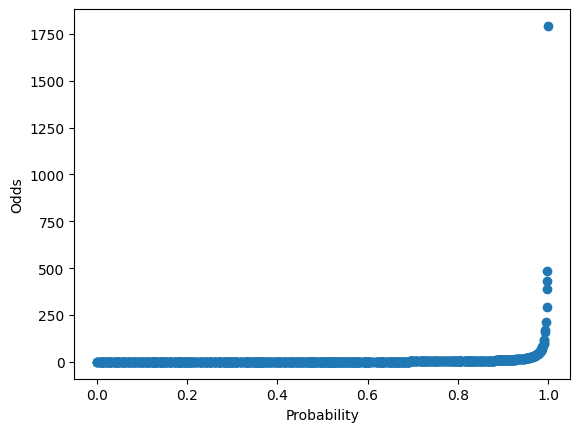

In [4]:
# график шансов и вероятности
p = [np.random.rand() for _ in range(1000)]
odds = [p_i/(1-p_i) for p_i in p]
plt.xlabel('Probability')
plt.ylabel('Odds')
plt.scatter(p, odds);

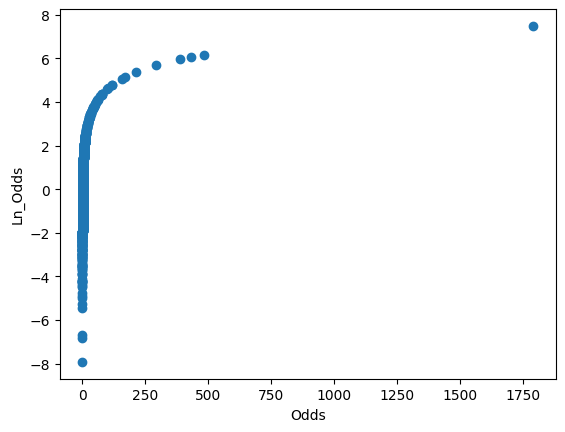

In [5]:
# сделали "вероятность" от - беск до +беск
ln_odds = [np.log(i) for i in odds]
plt.xlabel('Odds')
plt.ylabel('Ln_Odds')
plt.scatter(odds, ln_odds);

In [6]:
df = pd.read_csv('titanic (1).csv', delimiter=',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#stats.formula.api помогает сделать линейную регрессию
#GLM являются расширением модели линейной регрессии и используются, 
# когда переменная ответа не имеет нормального распределения или имеет нелинейную связь с переменными-предикторами.
# обобщенная регрессия линейной модели
print(df.Survived.value_counts())
intercept = np.log(342/549)
print(intercept)
glm_binom2 = smf.glm(formula="Survived ~ 1",
                     data=df, family=sm.families.Binomial()) # создали модель
# "survived ~ 1" - нет предикторов
# family = sm.families.Binomial() позволяет работать с бинарной зависимой переменной
model = glm_binom2.fit() # производим расчёт
p = np.exp(intercept) / (1 + np.exp(intercept))
print(np.log(p/(1-p)))
model.summary()

Survived
0    549
1    342
Name: count, dtype: int64
-0.4732877044469254
-0.4732877044469254


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      890
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -593.33
Date:                Thu, 15 May 2025   Deviance:                       1186.7
Time:                        23:52:26   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4733      0.069     -6.870      0.000      -0.608      -0.338
==============================================================================
"""

In [8]:
glmm_binom2 = smf.glm('Survived ~ 1', data = df, family = sm.families.Binomial())
model = glmm_binom2.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      890
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -593.33
Date:                Thu, 15 May 2025   Deviance:                       1186.7
Time:                        23:52:26   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4733      0.069     -6.870      0.000      -0.608      -0.338
==============================================================================
"""

In [9]:
# Модель с одним предиктором
glmm_binom2 = smf.glm('Survived ~ C(Sex)', data = df, family = sm.families.Binomial())
model = glmm_binom2.fit()
model.aic # показатель качества модели.
model.summary()
# Показатель качества помогает сравнивать модели между собой
# Тем меньше , тем лучше

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      889
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.90
Date:                Thu, 15 May 2025   Deviance:                       917.80
Time:                        23:52:26   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2605
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0566      0.129      8.191      0.000       0.804       1.309
C(Sex)[T.male]    -2.5137      0.167    -15.036      0.000      -2.841      -2.186
==================================================================================
"""

In [10]:
print(df.Sex.value_counts())
df1 = df.groupby(['Survived','Sex']).aggregate({'Sex':'count'})

Sex
male      577
female    314
Name: count, dtype: int64


In [11]:
odd_female = df1.Sex[1,'female']/df1.Sex[0, 'female']
odd_male = df1.Sex[1,'male']/df1.Sex[0, 'male']
print('Значение как в модели:', round(np.log(odd_male/odd_female),4)) # относительное значение шансов мужчин и женщин.
# Поэтому нета смысла хранить два столбика 
# ln(odds) = bo + b1*x

Значение как в модели: -2.5137


In [12]:
# Модель с двумя категориальными предикторами
glmm_b = smf.glm('Survived ~ C(Sex)*C(Pclass)', data = df, family = sm.families.Binomial()).fit() # C - указатель на категориальность
glmm_b.summary()
# в интерсепт хранится значение женщин в первом классе

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -399.05
Date:                Thu, 15 May 2025   Deviance:                       798.10
Time:                        23:52:26   Pearson chi2:                     891.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3534
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         3.4122      0.587      5.815      0.000       2.262       4.562
C(Sex)[T.male]                   -3.9494      0.616     -6.411      0.000      -5.157      -2.742
C(Pclass)[T.2]                   -0.9555      0.725     -1.318      0.187      -2.376       0.465
C(Pclass)[T.3]                   -3.4122      0.610     -5.594      0.000      -4.608      -2.217
C(Sex)[T.male]:C(Pclass)[T.2]    -0.1850      0.794     -0.233      0.816      -1.741       1.371
C(Sex)[T.male]:C(Pclass)[T.3]     2.0958      0.657      3.189      0.001       0.808       3.384
=================================================================================================
"""

In [13]:
df.groupby(['Survived', 'Pclass','Sex']).aggregate({'Sex':'count'})

Sex
Survived Pclass Sex        
0        1      female    3
                male     77
         2      female    6
                male     91
         3      female   72
                male    300
1        1      female   91
                male     45
         2      female   70
                male     17
         3      female   72
                male     47

In [14]:
odds_male_2 = 17/91
odds_female_2 = 70/6
odds_male_1 = 45/77
odds_female_1 = 91/3

In [15]:
#интерсепт выживших женщин в первом классе
print('Intercept:', round(np.log(91/3),4))
print('SexMale:', round(np.log(odds_male_1/odds_female_1),4))

Intercept: 3.4122
SexMale: -3.9494


In [16]:
#Взаимодействие двух номинативных переменных
#C(Sex)[T.male]:C(Pclass)[T.2] - пример взаимодействия двух номинативных переменных
# np.log(odds_male_2/odds_female_2) - np.log(odds_male_1/odds_female_1) - расчёт взаимодействия

print('C(Sex)[T.male]:C(Pclass)[T.2]:', round(np.log(odds_male_2/odds_female_2) - np.log(odds_male_1/odds_female_1),4))

C(Sex)[T.male]:C(Pclass)[T.2]: -0.185


In [17]:
#